In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from ntupleanalysis import *

In [2]:
plot_setup()

In [3]:
a8a8 = uproot.open("/gpfs/slac/atlas/fs1/d/murtazas/Haa/4g/outfile_a8a8gggg.root")['treeHZX']
a8a8.show()

RunNumber                  (no streamer)              asdtype('>i4')
mc_channel_number          (no streamer)              asdtype('>i4')
run                        (no streamer)              asdtype('>i4')
event                      (no streamer)              asdtype('>u8')
LBN                        (no streamer)              asdtype('>i4')
BCID                       (no streamer)              asdtype('>i4')
TimeStamp                  (no streamer)              asdtype('>i4')
PileupWeight               (no streamer)              asdtype('>f4')
PileupWeightUp             (no streamer)              asdtype('>f4')
PileupWeightDown           (no streamer)              asdtype('>f4')
PeriodWeight               (no streamer)              asdtype('>f4')
WeightGeneralMC            (no streamer)              asdtype('>f4')
MCWeights                  TStreamerSTL               asjagged(asdtype('>f8'), 10)
MCWeightNames              TStreamerSTL               asgenobj(STLVector(TString))
cut   

In [6]:
Events = prepare_dataset_table(["/gpfs/slac/atlas/fs1/d/murtazas/Haa/4g/outfile_a8a8gggg.root"], 
                                              "treeHZX", branch_list=["Tracks_pt","TruthTracks_pt","TruthTracks_Charge"], col_names=["Tracks_pt","TruthTracks_pt","TruthTracks_Charge"], entrysteps=10000000, outputype=Event_table)

Total number of events:  5233
Events in returned Object:  5233
Loading the data took  0.696169376373291  seconds


Text(0, 0.5, 'Counts')

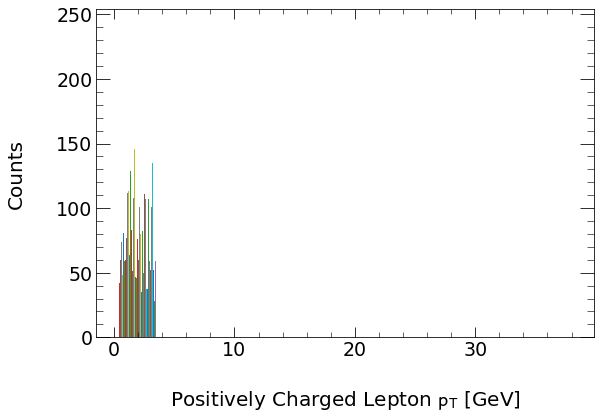

In [37]:
_,_,_=plt.hist(Events.events["Tracks_pt"]/1000.)
plt.xlabel(r"Positively Charged Lepton $p_T$ [GeV]",fontsize=20)
plt.ylabel(r"Counts",fontsize=20)

In [10]:
len(Events.events["Tracks_pt"][1])

150

In [11]:
len(Events.events["Tracks_pt"])

5233

In [4]:
zmumu = uproot.open("/home/bpn7/NTUPLE_Zmumu.root")['treeHZX']

In [5]:
mybranches = []
for mykey in zmumu.keys():
    mybranches+=[mykey.decode("utf-8")]

In [6]:
Events = prepare_dataset_table(["/home/bpn7/NTUPLE_Zmumu.root"], 
                                              "treeHZX", branch_list=mybranches, col_names=mybranches, entrysteps=10000000, outputype=Event_table)

Total number of events:  4970
Events in returned Object:  4970
Loading the data took  2.060102939605713  seconds


In [7]:
Events.events['TruthLP_pt']

array([29689.16795653, 73580.1015006 , 64288.55907383, ...,
       78877.39012202, 46532.56675804, 27408.11322738])

In [8]:
def minv(pt_pos,pt_neg,phi_pos,phi_neg,eta_pos,eta_neg):
    px_pos = pt_pos * np.cos(phi_pos)
    px_neg = pt_neg * np.cos(phi_neg)
    py_pos = pt_pos * np.sin(phi_pos)
    py_neg = pt_neg * np.sin(phi_neg)   
    pz_pos = pt_pos * np.sinh(eta_pos)
    pz_neg = pt_neg * np.sinh(eta_neg)  
    p_pos = pt_pos * np.cosh(eta_pos)
    p_neg = pt_neg * np.cosh(eta_neg)  
    minv = (p_pos+p_neg)**2 - (px_pos+px_neg)**2 - (py_pos+py_neg)**2 - (pz_pos+pz_neg)**2
    return minv**0.5

In [9]:
def pT(pt_pos,pt_neg,phi_pos,phi_neg,eta_pos,eta_neg):
    px_pos = pt_pos * np.cos(phi_pos)
    px_neg = pt_neg * np.cos(phi_neg)
    py_pos = pt_pos * np.sin(phi_pos)
    py_neg = pt_neg * np.sin(phi_neg)   
    pz_pos = pt_pos * np.sinh(eta_pos)
    pz_neg = pt_neg * np.sinh(eta_neg)  
    p_pos = pt_pos * np.cosh(eta_pos)
    p_neg = pt_neg * np.cosh(eta_neg)  
    minv = (px_pos+px_neg)**2 + (py_pos+py_neg)**2
    return minv**0.5

In [10]:
minvs = []
for i in range(len(Events.events['TruthLP_pt'])):
    pt_pos = Events.events['TruthLP_pt'][i]
    pt_neg = Events.events['TruthLM_pt'][i]
    phi_pos = Events.events['TruthLP_phi'][i]
    phi_neg = Events.events['TruthLM_phi'][i]
    eta_pos = Events.events['TruthLP_eta'][i]
    eta_neg = Events.events['TruthLM_eta'][i]
    minvs+=[minv(pt_pos,pt_neg,phi_pos,phi_neg,eta_pos,eta_neg)]

In [11]:
pTZs = []
for i in range(len(Events.events['TruthLP_pt'])):
    pt_pos = Events.events['TruthLP_pt'][i]
    pt_neg = Events.events['TruthLM_pt'][i]
    phi_pos = Events.events['TruthLP_phi'][i]
    phi_neg = Events.events['TruthLM_phi'][i]
    eta_pos = Events.events['TruthLP_eta'][i]
    eta_neg = Events.events['TruthLM_eta'][i]
    pTZs+=[pT(pt_pos,pt_neg,phi_pos,phi_neg,eta_pos,eta_neg)]

W0525 04:12:59.930229 140076477171520 font_manager.py:1282] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
W0525 04:12:59.951612 140076477171520 font_manager.py:1282] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
W0525 04:13:00.148825 140076477171520 font_manager.py:1282] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
W0525 04:13:00.153458 140076477171520 font_manager.py:1282] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
W0525 04:13:00.157507 140076477171520 font_manager.py:1282] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


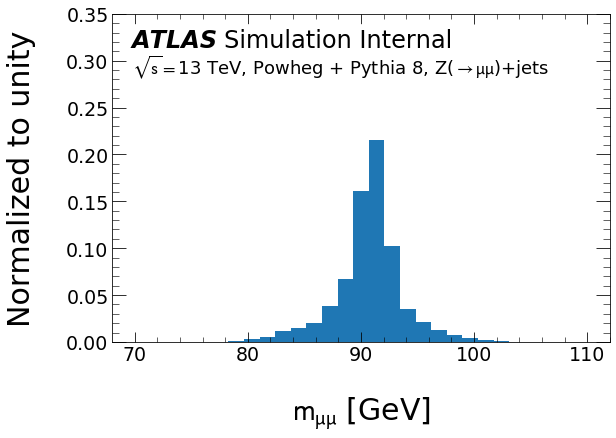

In [12]:
minvs=np.array(minvs)
_,_,_=plt.hist(minvs/1000.,bins=np.linspace(70,110,30),density=True)
plt.xlabel(r"$m_{\mu\mu}$ [GeV]")
plt.ylabel(r"Normalized to unity")
plt.ylim([0,0.35])
draw_atlas_text(lines=[r'$\sqrt{s} = $13 TeV, Powheg + Pythia 8, Z($\rightarrow\mu\mu$)+jets'])

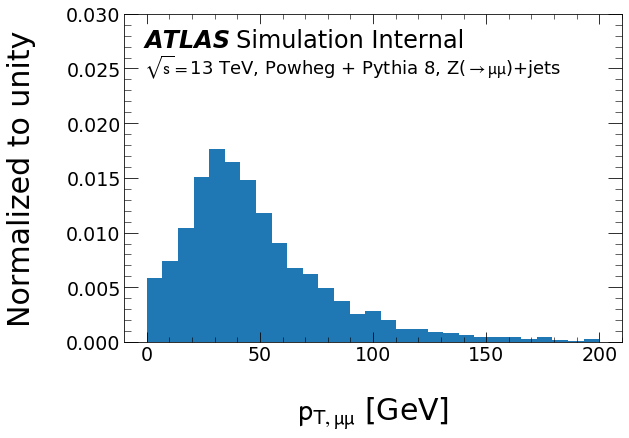

In [13]:
pTZs=np.array(pTZs)
_,_,_=plt.hist(pTZs/1000.,bins=np.linspace(0,200,30),density=True)
plt.xlabel(r"$p_{T,\mu\mu}$ [GeV]")
plt.ylabel(r"Normalized to unity")
plt.ylim([0,0.03])
draw_atlas_text(lines=[r'$\sqrt{s} = $13 TeV, Powheg + Pythia 8, Z($\rightarrow\mu\mu$)+jets'])

In [14]:
leadjets = []
fromjets = []
fromalls = []
for i in range(len(Events.events['TruthLP_pt'])):
    leadjets += [len(Events.events["Tracks_pt"][i][Events.events["Tracks_jetMatch"][i]==0])]
    fromjets += [len(Events.events["Tracks_pt"][i][Events.events["Tracks_jetMatch"][i]>-1])]
    fromalls += [len(Events.events["Tracks_pt"][i])]

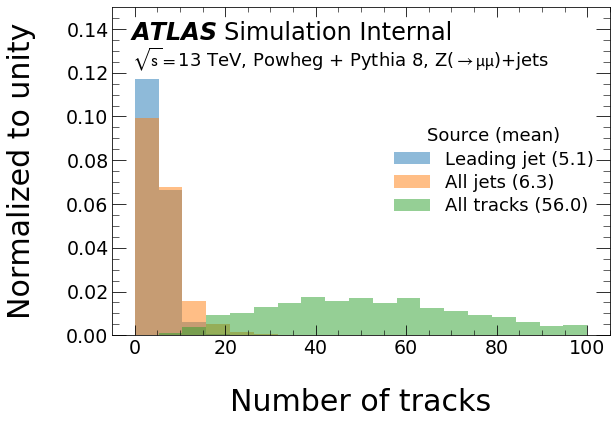

In [15]:
_,_,_=plt.hist(leadjets,bins=np.linspace(0,100,20),alpha=0.5,density=True,label="Leading jet ("+"%0.1f" % np.mean(leadjets)+")")
_,_,_=plt.hist(fromjets,bins=np.linspace(0,100,20),alpha=0.5,density=True,label="All jets ("+"%0.1f" % np.mean(fromjets)+")")
_,_,_=plt.hist(fromalls,bins=np.linspace(0,100,20),alpha=0.5,density=True,label="All tracks ("+"%0.1f" % np.mean(fromalls)+")")
plt.xlabel(r"Number of tracks")
plt.ylabel(r"Normalized to unity")
plt.legend(frameon=False,loc="center right",title="Source (mean)")
plt.ylim([0,0.15])
draw_atlas_text(lines=[r'$\sqrt{s} = $13 TeV, Powheg + Pythia 8, Z($\rightarrow\mu\mu$)+jets'])

In [16]:
#look at pT of jet versus pT of Z.
#something about truth
#something about uncers

ntupleanalysis.table.Event_table